In [17]:
import numpy as np
import pygimli as pg
from pygimli.physics import ert
import pygimli.meshtools as mt

In [18]:
data = ert.load('Surveys/full_data/nov_25_2.dat')

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f2607215720>)

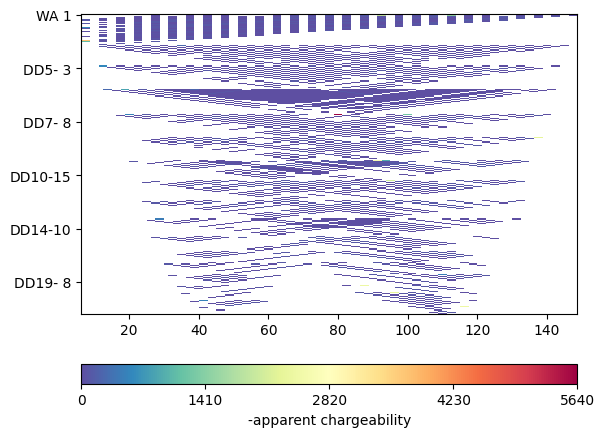

In [19]:
data.show("ip", label="-apparent chargeability")

In [20]:
data["k"] = ert.geometricFactors(data)

In [21]:
data["rhoa"] = data("r") * data("k") 

In [22]:
data.estimateError()

In [23]:
import seaborn as sns
import pandas as pd

<Axes: ylabel='Count'>

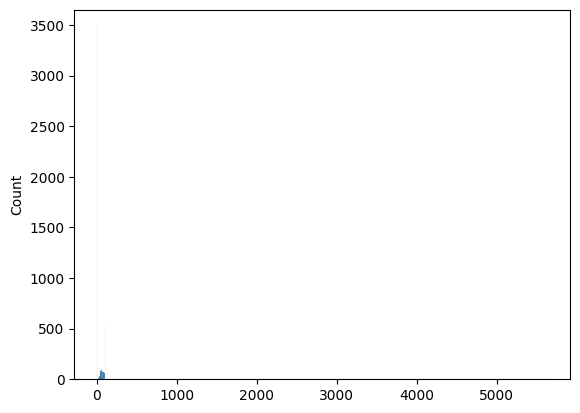

In [24]:
sns.histplot(data["ip"])

In [25]:
data.remove(data["ip"] < 0)

In [26]:
print(data)

Data: Sensors: 32 data: 4923, nonzero entries: ['a', 'b', 'err', 'ip', 'k', 'm', 'n', 'r', 'rhoa', 'valid']


In [27]:
data_array_ip = np.array(data["ip"])

In [28]:
data_series_ip = pd.Series(data_array_ip)

In [32]:
quantile_99 = data_series_ip.quantile(0.99)

In [33]:
quantile_99

99.0

In [34]:
data.remove(data["ip"] > 99)

<Axes: ylabel='Count'>

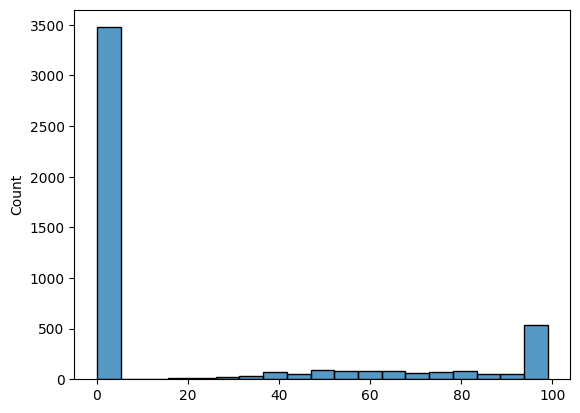

In [37]:
sns.histplot(data["ip"])

In [59]:
quantile_7055_ip = data_series_ip.quantile(0.7055)
quantile_7055_ip

0.2585325000000019

In [60]:
data["ip"] = [quantile_7055_ip if ip < quantile_7055_ip else ip for ip in data["ip"]] 

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f2606001510>)

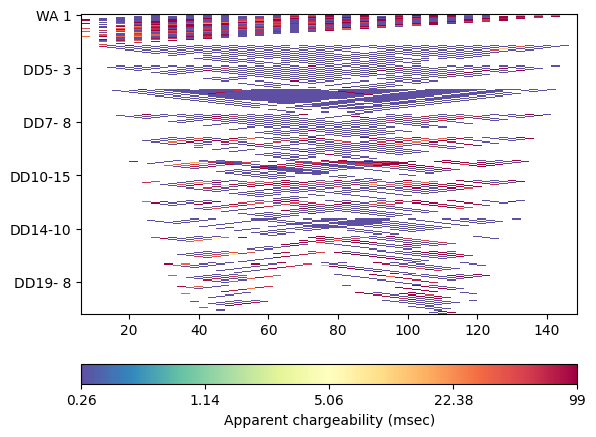

In [61]:
data.show("ip", label="Apparent chargeability (msec)")

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f25f9cb6b00>)

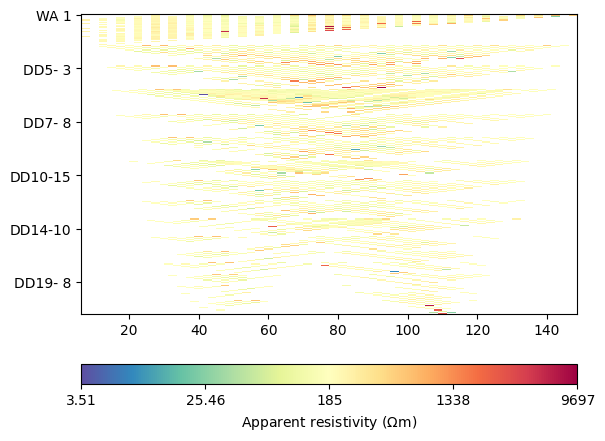

In [70]:
ert.show(data)

In [71]:
data_array_res = np.array(data["rhoa"])
data_series_res = pd.Series(data_array_res)
quantile_99_res = data_series_res.quantile(0.99)

In [72]:
quantile_99_res

959.4448460130667

In [73]:
data.remove(data["rhoa"] > quantile_99_res)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f25fa02e9e0>)

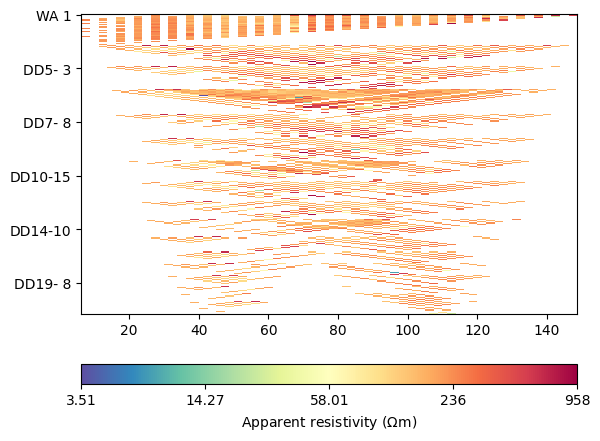

In [81]:
ert.show(data)

In [82]:
mgr2 = ert.ERTIPManager(data)

In [83]:
inv2 = mgr2.invert(secNodes=1, paraMaxCellSize=10.0,
                   zWeight=0.2, verbose=1)

16/02/24 - 00:31:58 - pyGIMLi - INFO - Found 2 regions.
16/02/24 - 00:31:58 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/02/24 - 00:31:58 - pyGIMLi - INFO - Found 2 regions.
16/02/24 - 00:31:58 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
16/02/24 - 00:31:58 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/02/24 - 00:31:58 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Constructing Delaunay triangulation by divide-and-conquer method.
Delaunay milliseconds:  0
Recovering segments in Delaunay triangulation.
Segment milliseconds:  0
Removing unwanted triangles.
Spreading regional attributes and area constraints.
Hole milliseconds:  0
Adding Steiner points to enforce quality.
Quality milliseconds:  1

Writing vertices.
Writing triangles.
Writing segments.
Writing edges.

Output milliseconds:  0
Total running milliseconds:  2

Statistics:

  Input vertices: 71
  Input segments: 72
  Input holes: 0

  Mesh vertices: 1434
  Mesh triangles: 2764
  Mesh edges: 4197
  Mesh exterior boundary edges: 102
  Mesh interior boundary edges: 76
  Mesh subsegments (constrained edges): 178



16/02/24 - 00:31:59 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5631 Cells: 11056 Boundaries: 8394
16/02/24 - 00:31:59 - pyGIMLi - INFO - Use median(data values)=185.69598423833938
16/02/24 - 00:31:59 - pyGIMLi - INFO - Created startmodel from forward operator: 2148 [185.69598423833938,...,185.69598423833938]
16/02/24 - 00:31:59 - pyGIMLi - INFO - Starting inversion.


min/max(dweight) = 33.02/33.3322
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x7f25f989f3d0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x7f25fc31f3d0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x7f25f9bfa650>
min/max (data): 3.51/958
min/max (error): 3%/3.03%
min/max (start model): 186/186
--------------------------------------------------------------------------------
use model trans from RegionManager
Calculating response for model: min = 185.696 max = 185.696
Allocating memory for primary potential...... 0.0056823

No primary potential for secondary field calculation with topography.
Creating P2-Primmesh:		Nodes: 22317	Cells: 11056	Boundaries: 16686
ModellingBase::setMesh() copying new mesh ... Found topography for surface=1562.73 : 1562.52
Found datafile: 32 electrodes
Found: 32 node-electrodes
rMin = 2.50062, rMax = 311.107
NGauLeg + NGauLag for inverse Fouriertransformation: 12 + 4
Found non-Neumann domain


16/02/24 - 00:35:17 - pyGIMLi - INFO - Found 1 regions.
16/02/24 - 00:35:17 - Core - INFO - Create H2 refined mesh for forward tasks.
16/02/24 - 00:35:17 - pyGIMLi - INFO - Starting inversion.


-269.16 max = 760.652 mean = 153.934
Reciprocity rms(modelReciprocity) 36.5962%, max: 459.836%
4: LS newModel: min = 1.21691; max = 47692.8
4: LS newResponse: min = 29.6505; max = 477.329
4: rms/rrms(data, LS newResponse) = 102.238/69.742%
4: chi^2(data, LS newResponse, error, log) = 234.789
4: Phi = 1.13332e+06+238.123*20=1.13809e+06
Linesearch tau = 0.04
Calculating response for model: min = 22.3037 max = 2842.88
Using existing primary potentials.
Forward: time: 4.66731s
Response: min = 131.794 max = 316.045 mean = 179.916
Reciprocity rms(modelReciprocity) 3.96114%, max: 22.9175%
chi² = 155.56 (dPhi = 1.38%) lam: 20.0
################################################################################
#                 Abort criteria reached: dPhi = 1.38 (< 2.0%)                 #
################################################################################
4: Model: min = 22.3037; max = 2842.88
4: Response: min = 131.596; max = 306.193
4: rms/rrms(data, Response) = 92.4178/91.2093%
4

(1530.0, 1575.122437)

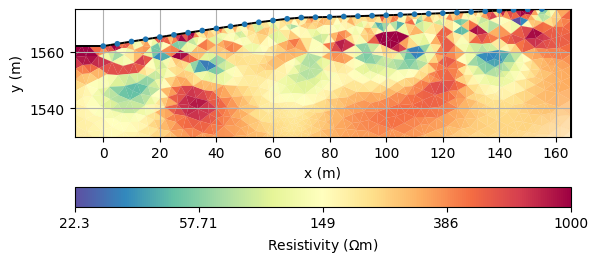

In [94]:
kw = dict(logScale=True, cMap="Spectral_r", xlabel="x (m)", ylabel="y (m)", cMin=0, cMax=1000)
ax, cb = mgr2.showResult(**kw)
ax.grid(True)
ax.set_ylim([1530, ax.get_ylim()[1]])

(1530.0, 1575.122437)

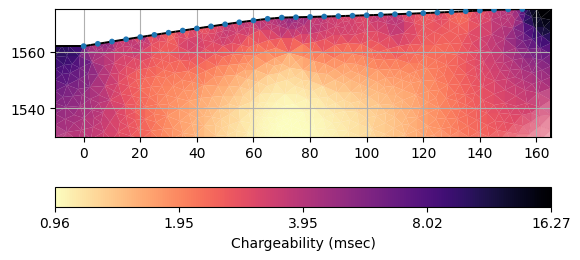

In [89]:
ax, cb = mgr2.showIPModel(label="Chargeability (msec)")
ax.grid(True)
ax.set_ylim([1530, ax.get_ylim()[1]])

array([<Axes: >, <Axes: >], dtype=object)

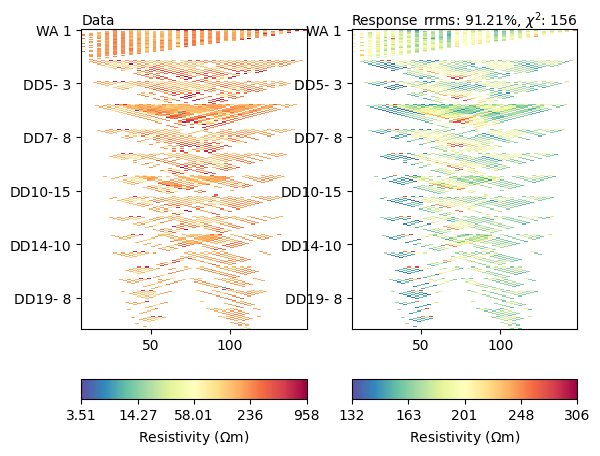

In [90]:
mgr2.showFit()